# Examining the Titanic Through Machine Learning
##### Meks Egbuchunam


Dataset: [Titanic - Machine Learning From Disaster](https://www.kaggle.com/competitions/titanic)


I will be exploring a dataset containing records of Titanic passengers and their attributes. Using this dataset, I will train machine learning models to predict survival based on features such as class, gender, and age, while also identifying which factors were most strongly correlated with survival.

--------------------------------------------------------

## Data Collection

I procured this dataset from kaggle.

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/DS Projects/Titanic/Datasets/train.csv")

# Made a copy of the dataset
train_df = df.copy()

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----------------------------------

## Data Cleaning and Preprocessing

I will attempt to handle any contingencies within the dataset before I can comfortably work with it.

In [3]:
# Want to know what the dataset looks like

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Checking the min and max, as well as the mean and median, for age

Agemin = train_df["Age"].min()

Agemax = train_df["Age"].max()

Agemedian = train_df["Age"].median()
Agemean = train_df["Age"].mean()

print("Min for the Age column: ", Agemin)
print("Max for the Age column: ", Agemax)
print("Median for the Age column: ", Agemedian)
print("Mean for the Age column: ", Agemean)

Min for the Age column:  0.42
Max for the Age column:  80.0
Median for the Age column:  28.0
Mean for the Age column:  29.69911764705882


In [8]:
Ageover30 = (train_df["Age"] > 30).sum()

Ageunder30 = (train_df["Age"] <= 30).sum()

Total = ((train_df["Age"] > 30).sum()) + ((train_df["Age"] <= 30).sum())

print(Ageover30)
print(Ageunder30)
print(Total)



305
409
714


In [9]:
# Dropped the "Cabin" column due to it having too many NaN values

train_df.drop("Cabin", axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
# Replaced missing values in the "Age" column with the median of all ages

train_df["Age"].fillna(Agemedian, inplace = True)

print("done")

done


In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
newmedian = train_df["Age"].median()

newmean = train_df["Age"].mean()

print(newmedian)
print(newmean)

28.0
29.36158249158249


In [13]:
train_df["Age"].isnull().sum()

0

In [14]:
# looking for the most frequent value. We will use this value to replace the two missing values in this column

print(train_df["Embarked"].value_counts(normalize = True))

print(train_df["Embarked"].mode())

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64
0    S
Name: Embarked, dtype: object


In [15]:
# Replacing the values

embarked_mode = train_df["Embarked"].mode()[0]

train_df["Embarked"].fillna(embarked_mode, inplace = True)

In [16]:
train_df["Embarked"].isnull().sum()

0

In [17]:
Faremin = train_df["Fare"].min()

Faremax = train_df["Fare"].max()

print(Faremin)
print(Faremax)

0.0
512.3292


In [18]:
# The data in the fare column may be skewed due to extremely high values. I will apply a log transformation to compress the data and streamline subsequent processes.

train_df["Fare_log"] = np.log1p(train_df["Fare"])



In [19]:
Fare_log_min = train_df["Fare_log"].min()

Fare_log_max = train_df["Fare_log"].max()

print(Fare_log_min)
print(Fare_log_max)

0.0
6.240917354759096


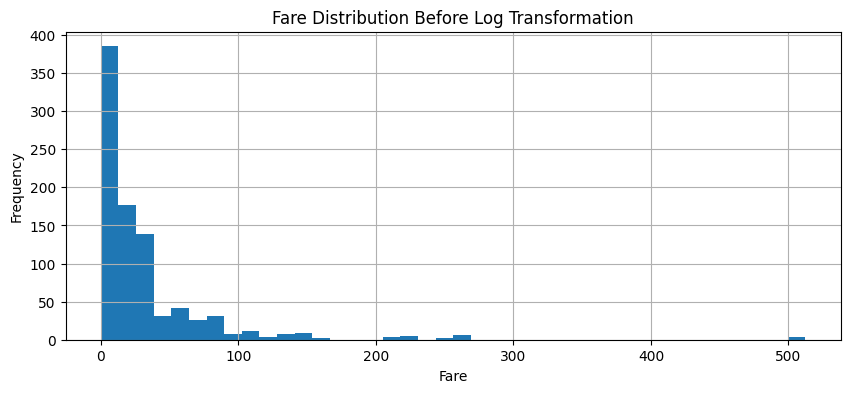

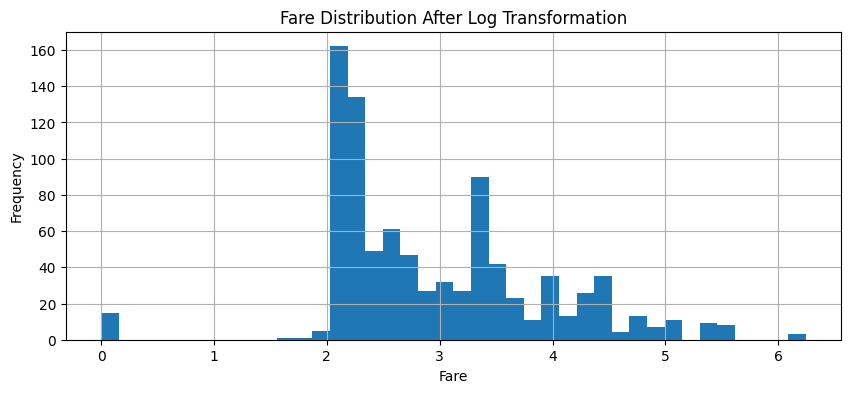

In [20]:
# A visual representation of the log transformation


# Graph before the log transformation
train_df["Fare"].hist(bins = 40 , figsize = (10,4))
plt.title("Fare Distribution Before Log Transformation")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# Graph after the log transformation
train_df["Fare_log"].hist(bins = 40 , figsize = (10,4))
plt.title("Fare Distribution After Log Transformation")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

--------------------

## EDA

In order to gain instghts into the data, I will conduct an Exploratory Data Analysis.

In [21]:
print(train_df.columns)

train_df.dtypes


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_log'],
      dtype='object')


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Fare_log       float64
dtype: object

In [22]:
print(train_df.info())
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


In [23]:
# 1 means they survived, 0 means they did not

train_df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

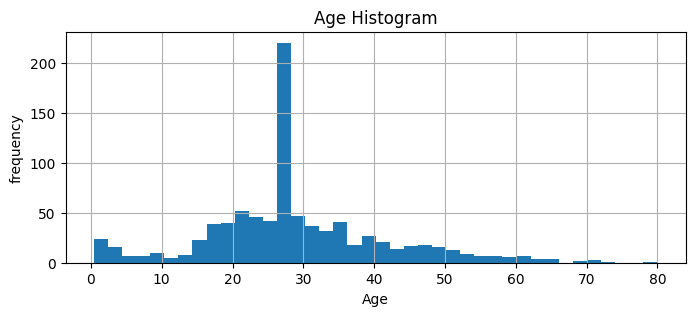

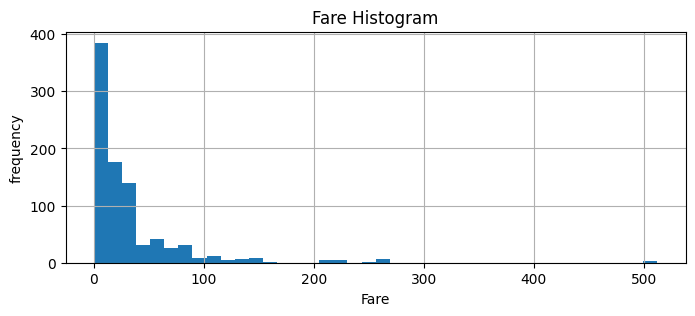

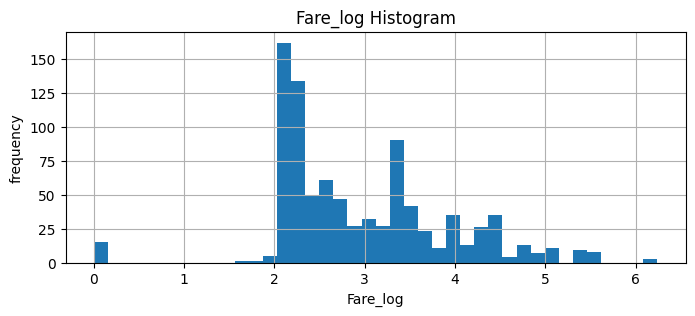

In [24]:
# checking the histogram of all numerical columns with continuous data

hist_col = ["Age", "Fare", "Fare_log"]

for col in hist_col:
    train_df[col].hist(bins = 40 , figsize = (8,3))
    plt.title(f"{col} Histogram")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

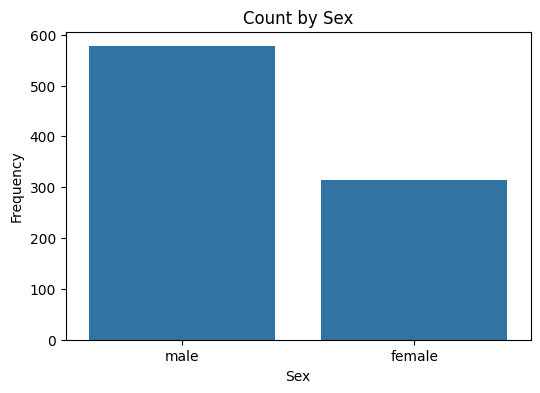

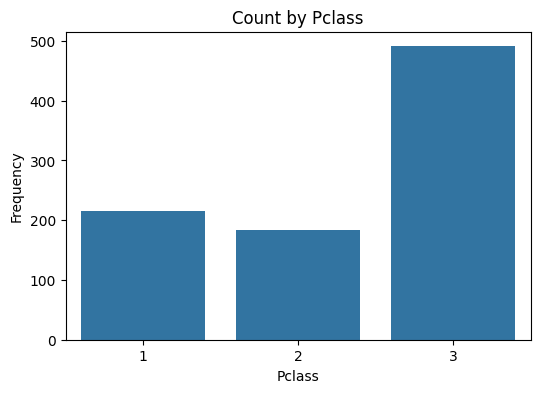

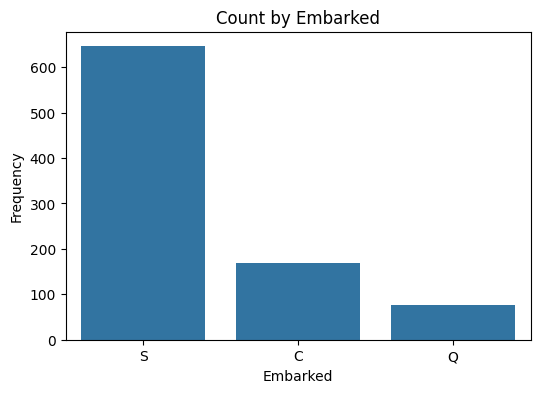

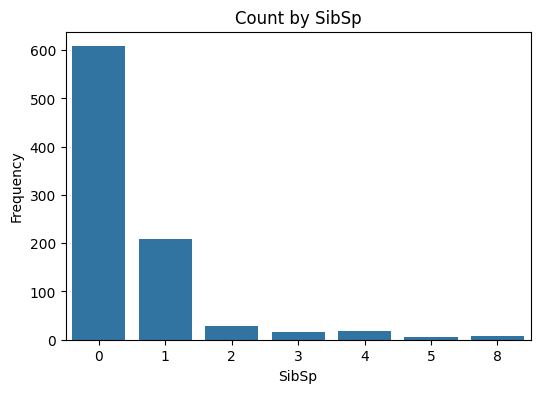

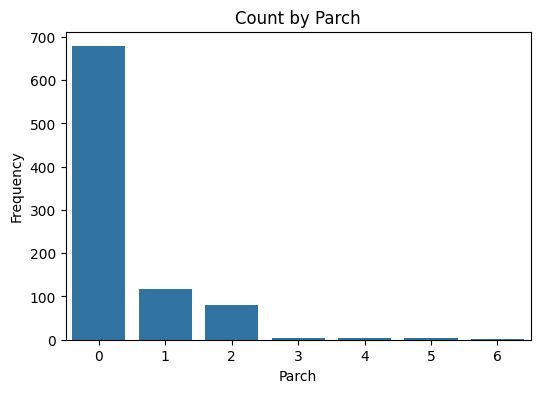

In [25]:

category_col = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for col in category_col:
    plt.figure(figsize = (6,4))
    sns.countplot(x = col, data = train_df)
    plt.title(f"Count by {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

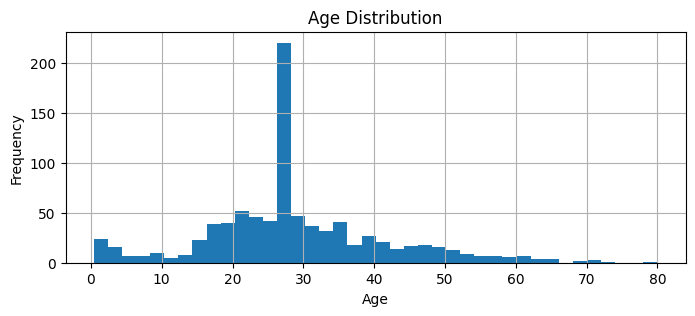

In [26]:
# The Age distribution of the passengers again

train_df["Age"].hist(bins = 40 , figsize = (8,3))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Based on the visualizations, the typical passenger profile was a male in his 20s, traveling in third class, with no spouse, parents, children, or siblings on board, and who embarked from Southampton.

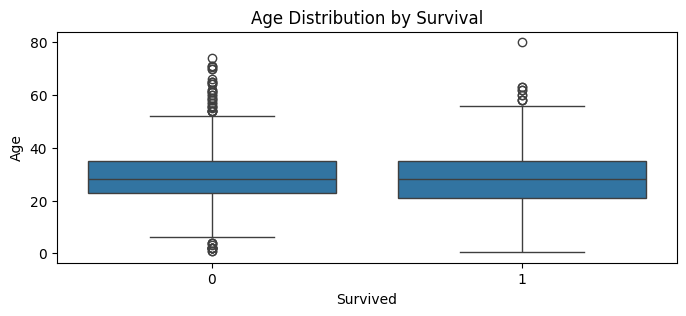

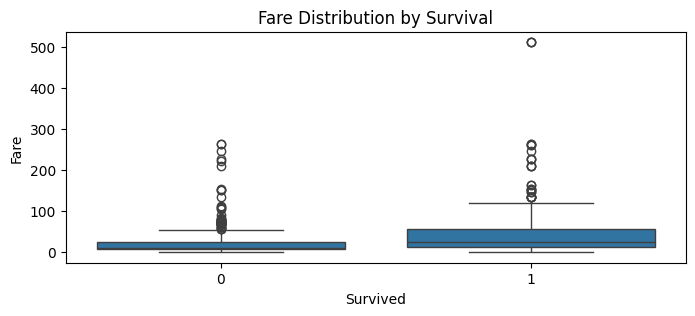

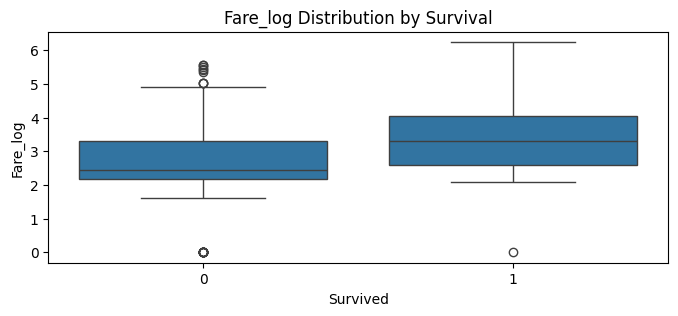

In [27]:
# Box Plots to visualize the continuous columns and their distributions

cont_col = ["Age", "Fare", "Fare_log"]

for col in cont_col:
    plt.figure(figsize = (8,3))
    sns.boxplot(x= "Survived", y = col, data = train_df)
    plt.title(f"{col} Distribution by Survival")
    plt.show()

The boxplots were helpful in getting an idea of the correlations, demonstrating potential differences in how age and fare affected survivability. However, they do not display anything conclusive. As a result, I conducted point biserial correlation calculations to gain deeper insights, rather than relying on a solely visible perspective.

In [28]:
from scipy.stats import pointbiserialr

cont_col = ["Age", "Fare", "Fare_log"]

for col in cont_col:
    corr, pval = pointbiserialr(train_df["Survived"], train_df[col])
    print(f"{col}: correlation = {corr: .3f}, p-value = {pval: .3g}")

Age: correlation = -0.065, p-value =  0.0528
Fare: correlation =  0.257, p-value =  6.12e-15
Fare_log: correlation =  0.330, p-value =  4.65e-24


The point-biserial correlations showed that age had little relationship with survival, while Fare had a moderate positive correlation. The log-transformed fare (`Fare_log`) performed even better, showing that the applied log function helped reduce the skew and reveal a clearer relationship between ticket price and survivability.

In [29]:
from scipy.stats import chi2_contingency

cat_col = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for col in cat_col:
    table = pd.crosstab(train_df[col], train_df["Survived"])
    chi2, p, dof, ex = chi2_contingency(table)
    print(f"{col}: chi2 = {chi2}, p-value = {p}")

Sex: chi2 = 260.71702016732104, p-value = 1.1973570627755645e-58
Pclass: chi2 = 102.88898875696056, p-value = 4.549251711298793e-23
Embarked: chi2 = 25.964452881874784, p-value = 2.3008626481449577e-06
SibSp: chi2 = 37.2717929152043, p-value = 1.5585810465902147e-06
Parch: chi2 = 27.925784060236168, p-value = 9.703526421039996e-05


The Chi-Square tests show a significant association across all five categorical variables in relation to survivability, with the sex of the passenger being the strongest (χ² ≈ 260.7, highly significant). Ticket class (`Pclass`) also showed statistical significance while being the second-strongest association. `SibSp`, `Parch`, and `Embarked` all showed much lower association, but were still relatively high. Embarking point carried the weakest but still notable associations compared to the other variables.

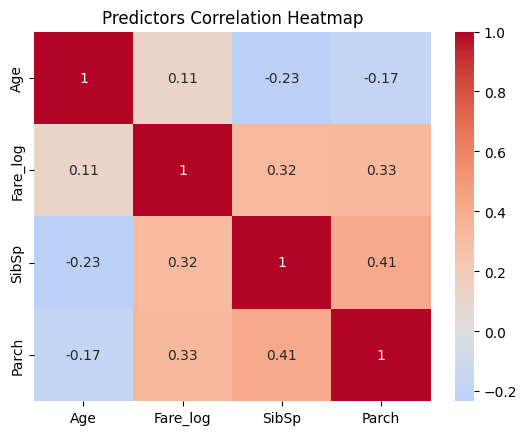

In [30]:
# I will not be using the "Fare" column for modeling

# Checking for redundancy among any of the numeric features in the dataset. 

num_cols = ["Age", "Fare_log", "SibSp","Parch"]
corr_matrix = train_df[num_cols].corr()

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center = 0)
plt.title("Predictors Correlation Heatmap")
plt.show()

There appears to be little correlation between the numeric predictor features within the dataset. `SibSp` and `Parch` showed the strongest association among the aforementioned, though still moderate.

In [31]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


In [32]:
# Checking for redundancy among any of the categorical features in the dataset.



     
def cramers_v(confusion_matrix):
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    n= confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    V = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return V, chi2, p


pairs = [("Sex", "Pclass"), ("Sex", "Embarked"), ("Pclass", "Embarked")]

for col1, col2 in pairs:
    table = pd.crosstab(train_df[col1], train_df[col2])
    V, chi2, p = cramers_v(table)
    print(f"{col1} vs {col2}: chi 2 = {chi2}, p-value = {p: .3g}, Cramer's V = {V:.3f}")


Sex vs Pclass: chi 2 = 16.971499095517114, p-value =  0.000206, Cramer's V = 0.130
Sex vs Embarked: chi 2 = 12.91702420065256, p-value =  0.00157, Cramer's V = 0.111
Pclass vs Embarked: chi 2 = 122.64116372971472, p-value =  1.46e-25, Cramer's V = 0.258


According to the results of the Chi-Square tests, the predictor features are significantly associated with each other (p < 0.05). This is not enough to declare any of the variables redundant, as the associations are generally weak. `Pclass` and `Embarked` seemed to be the most associated among the categorical variables, showing a weak to moderate correlation.

-----------------

## Feature Engineering

I will now be preparing the dataset for the subsequent training/test split and modeling process

In [33]:
# Encoding all the categorical variables in order to streamline the modeling process

# binary encoding sex
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})

In [34]:
# One-hot encoding Pclass and dropping the original column

Pclass_dummies = pd.get_dummies(train_df["Pclass"], prefix = "Pclass").astype(int)

train_df = pd.concat([train_df, Pclass_dummies], axis = 1)

train_df.drop("Pclass", axis = 1, inplace = True)


In [35]:
# One-hot encoding Embarked and dropping the original column

Embarked_dummies = pd.get_dummies(train_df["Embarked"], prefix = "Embarked").astype(int)

train_df = pd.concat([train_df, Embarked_dummies], axis = 1)

train_df.drop("Embarked", axis = 1, inplace = True)

In [36]:
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.110213,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.188856,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.990834,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.202765,0,0,1,0,0,1


In [37]:
# Standardizing all of the continuous variables (Age and Fare_log)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df[["Age_standard", "Fare_log_standard"]] = scaler.fit_transform(train_df[["Age", "Fare_log"]])

In [38]:
train_df[["Age", "Age_standard", "Fare_log", "Fare_log_standard"]].head()

,Age,Age_standard,Fare_log,Fare_log_standard
0,22.0,-0.565736,2.110213,-0.879741
1,38.0,0.663861,4.280593,1.361220
2,26.0,-0.258337,2.188856,-0.798540
3,35.0,0.433312,3.990834,1.062038
4,35.0,0.433312,2.202765,-0.784179


`SibSp` and `Parch` are inherently adjacent in nature, as both describe family members on board. That is why I have decided to combine the two features into one category called "FamilySize" in order to streamline training. The original features will be retained, as I will be running trials without `FamilySize` to compare outcomes.

In [39]:
train_df["FamilySize"] = train_df["SibSp"]  + train_df["Parch"] + 1

I will also be creating a new column that flags passengers who are traveling alone (FamilySize = 1), to potentially improve the accuracy of the models.

In [40]:
train_df["Alone"] = (train_df["FamilySize"] == 1).astype(int)

In [41]:
train_df[["Alone", "FamilySize"]].head()

,Alone,FamilySize
0,0,2
1,0,2
2,1,1
3,0,2
4,1,1


In [42]:
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_standard,Fare_log_standard,FamilySize,Alone
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,0,1,-0.565736,-0.879741,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,1,0,0,0.663861,1.361220,2,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,0,0,1,-0.258337,-0.798540,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,1,0,0,0,0,1,0.433312,1.062038,2,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,0,1,0.433312,-0.784179,1,1


In [43]:
# Dropping all unnecessary columns

train_df.drop(["PassengerId", "Name", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis = 1, inplace = True)

train_df.head()

,Survived,Sex,Fare_log,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_standard,Fare_log_standard,FamilySize,Alone
0,0,0,2.110213,0,0,1,0,0,1,-0.565736,-0.879741,2,0
1,1,1,4.280593,1,0,0,1,0,0,0.663861,1.361220,2,0
2,1,1,2.188856,0,0,1,0,0,1,-0.258337,-0.798540,1,1
3,1,1,3.990834,1,0,0,0,0,1,0.433312,1.062038,2,0
4,0,0,2.202765,0,0,1,0,0,1,0.433312,-0.784179,1,1


-------------

## Modeling and Evaluation

In this step, we will work with algorithms and train them to successfully predict the survival status of each passenger in the dataset, as well as assessing the performance of each model.

In [45]:
# The train/test split

from sklearn.model_selection import train_test_split

X = train_df.drop("Survived", axis = 1)
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size = 0.2, random_state = 42, stratify = y)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (712, 12)
Validation set shape: (179, 12)


I will now begin modeling, starting with logistic regression.

In [46]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter = 1000, random_state = 42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[98 12]
 [22 47]]


The classification report showed that Logistic Regression performed solidly, with an overall accuracy of about 81%. It showed the most promise in the recall of the non-survivors (0), but struggled with the recall of survivors (1). Regarding precision, the model performed moderately well, with a precision of about 82% and 80% for the non-survived and survived classes respectively.

In [47]:
# Moving on to the Random Forest algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)


print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[95 15]
 [20 49]]


Random Forest had less accuracy (80%) than Logistic Regression. Additionally, precision (83% for the non-survivors, 77% for the survivors) and recall (86% for the non-survivors, 71% for the survivors) were also slightly less efficient than Logistic Regression.  

In [48]:
# Moving on to Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[95 15]
 [18 51]]


Decision Tree is the best performing algorithm so far, with an accuracy of about 81.5%. However, its performance was only a hair better than Logistic Regression. It had a precision of 84% for the non-survived and 77% for the survived, and a recall of 86% for the non-survived and 74% for the survived. Compare this to Logistic Regression (precision of 82% for non-survived and 80% for survived, and recall of 89% for non-survived and 68% for the survived), Decision Tree edges it out. Decision Tree was better at detecting true positives while maintaining a similar level of accuracy.

In [49]:
# KNN next

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.776536312849162

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179


Confusion Matrix:
 [[94 16]
 [24 45]]


KNN seems to be the least effective algorithm in relation to this dataset, with an accuracy of about 77.6%. While its precision rates were moderately similar to the other algorithms, its recall for survivors was lackluster at 65%. It performed only slightly worse when identifying true positives, but also worse when identifying true negatives, making it the worst performing algorithm currently.

In [50]:
#XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[94 16]
 [20 49]]


XGBoost performed slightly worse than Random Forest, though better than KNN. It had an accuracy of 79.8%, with higher marks in precision and recall specifically tied to the passengers who did not survive. Regarding the prediction of the passengers who did, there was a notable decline in performance, with precision at 75% and recall at 71%, specifically regarding passengers who have survived.

In [52]:
# Loading the Test dataset

df2 = pd.read_csv("D:/DS Projects/Titanic/Datasets/test.csv")

test_df = df2.copy()

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test_df.shape

(418, 11)

In [53]:
# cleaning the test dataset

na_counts = test_df.isnull().sum()

na_counts_nonzero = na_counts[na_counts > 0]

if na_counts_nonzero.empty:
    print("No missing values")
else:
    print("Missing values:")
    print(na_counts_nonzero)


Missing values:
Age       86
Fare       1
Cabin    327
dtype: int64


In [55]:
# Must make the test dataset look like the training one (aside from the Survived column being dropped)

# Replaced missing values in the "Age" column with the median of all ages
Agemedian = test_df["Age"].median()
test_df["Age"].fillna(Agemedian, inplace = True)

#Replacing missing values in "Embarked" with the mode
EmbarkedMode = test_df["Embarked"].mode()[0]
test_df["Embarked"].fillna(EmbarkedMode, inplace = True)

# Replacing missing values in "Fare" with the median
Faremedian = test_df["Fare"].median()
test_df["Fare"].fillna(Faremedian, inplace = True)

#Log Transform the "Fare" column
test_df["Fare_log"] = np.log1p(test_df["Fare"])

# Encoding all the categorical variables in order to streamline the modeling process
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})

# One-hot encoding Pclass and dropping the original column
Pclassdummies = pd.get_dummies(test_df["Pclass"], prefix = "Pclass").astype(int)
test_df = pd.concat([test_df, Pclassdummies], axis = 1)
test_df.drop("Pclass", axis = 1, inplace = True)

# One-hot encoding Embarked and dropping the original column
Embarkeddummies = pd.get_dummies(test_df["Embarked"], prefix = "Embarked").astype(int)
test_df = pd.concat([test_df, Embarkeddummies], axis = 1)
test_df.drop("Embarked", axis = 1, inplace = True)

# Standardizing all of the continuous variables (Age and Fare_log)
test_df[["Age_standard", "Fare_log_standard"]] = scaler.transform(test_df[["Age", "Fare_log"]])

# Creating a new column called "FamilySize"
test_df["FamilySize"] = test_df["SibSp"]  + test_df["Parch"] + 1

# Creating an "Alone" column for passengers who are traveling on their own
test_df["Alone"] = (test_df["FamilySize"] == 1).astype(int)

# Dropping the rest of the unnecessary columns
test_df.drop(["PassengerId", "Name", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis = 1, inplace = True)

test_df.head()

,Sex,Fare_log,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_standard,Fare_log_standard,FamilySize,Alone
0,0,2.178064,0,0,1,0,1,0,0.394887,-0.809683,1,1
1,1,2.079442,0,0,1,0,0,1,1.355510,-0.911513,2,0
2,0,2.369075,0,1,0,0,1,0,2.508257,-0.612461,1,1
3,0,2.268252,0,0,1,0,0,1,-0.181487,-0.716562,1,1
4,1,2.586824,0,0,1,0,0,1,-0.565736,-0.387631,3,0


The test dataset is now identical to the training dataset (regarding features and scaling). I can apply the best performing algorithm to it.

In [58]:

best = DecisionTreeClassifier(random_state=42)
best.fit(X, y)

test_pred = best.predict(test_df)

passenger_ids = pd.read_csv("D:/DS Projects/Titanic/Datasets/test.csv")["PassengerId"]

submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": test_pred
})

submission.to_csv("submission.csv", index=False)
print("done")

done


In [59]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


I have applied Decision Tree (the best performing algorithm) to the test dataset and generated the submission file. I will now submit that file to Kaggle.

---

## Conclusion

After thorough cleaning and processing of the training dataset (`train_df`), I trained multiple algorithms to predict survival outcomes with moderate efficiency. Among the models tested, the Decision Tree achieved the highest prediction rate, so I selected it for final predictions on the provided test dataset (`test_df`).

Submitting these predictions to Kaggle resulted in a score of **0.72009**, meaning the model correctly predicted survival outcomes for about 72% of passengers. While this is a respectable result, there remains room for optimization through hyperparameter tuning and other advanced methods. For the purposes of this project, however, the focus was on demonstrating the data science pipeline rather than maximizing leaderboard performance. Future improvements could focus on a different approach to increase predictive accuracy.